# Identification
Please indicate your name and parcours (e.g.: IMA, DIGIT, BIM, DAC, ..., Erasmus)

Student 1: GROC Simon

Student 2: HIBAOUI Imane

# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int32
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [57]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('moon.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

In [ ]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_demo.html

## Exercise 1
In this exercise, we work with image `img/moon.png`. If possible give two solutions: one with loops (for, while, ...) and one without loops using Numpy arithmetic avoiding ad-hoc Numpy functions such as `np.where()`. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [12]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    # Open the image using PIL
    img = Image.open(fname)
    
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    return img_array

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [37]:
def countPixels(I,k):
    """ Array*int -> int"""
    return np.sum(I == k)

3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [62]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    I_c = np.copy(I)  # Make a copy to avoid modifying the original array
    I_c[I_c== k1] = k2
    return I_c



""" 
    I_copy = np.copy(I)
    for i in range(len(I_copy)):
        for j in range(len(I_copy[i])):
            if I_copy[i][j] == k1:
                I_copy[i][j] = k2
    return I_copy
"""

' \n    I_copy = np.copy(I)\n    for i in range(len(I_copy)):\n        for j in range(len(I_copy[i])):\n            if I_copy[i][j] == k1:\n                I_copy[i][j] = k2\n    return I_copy\n'

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [39]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    I_min = I.min()
    I_max = I.max()
    I_norm = ((I - I_min) / (I_max - I_min)) * (k2 - k1) + k1
    return I_norm


""" 
    I_min = I[0][0]
    I_max = I[0][0]
    for i in range(len(I)):
        for j in range(len(I[i])):
            if I_min > I[i][j]:
                I_min = I[i][j]
            if I_max < I[i][j]:
                I_max = I[i][j]
    I_copy = np.copy(I)
    for i in range(len(I_copy)):
        for j in range(len(I_copy[i])):
            I_copy[i][j] = (k2-k1)*((I_copy[i][j] - I_min)/(I_max-I_min)) +k1
    return I_copy
    
"""  


5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

In [40]:
def inverteImage(I):
    """ Array -> Array """
    return 255 - I

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [65]:
def computeHistogram(I):
    """ Array -> list[int] """
    Liste = [0]*256
    for row in I:
        for value in row:
            Liste[int(value)] +=1
    return Liste

# Non, car nous devons connaitre le nombre de pixel pour chacune des intensités lumineuses.
    


7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [42]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    I_copy = np.copy(I)
    
    for i in range(len(I_copy)):
        for j in range(len(I_copy[i])):
            if I_copy[i][j] < s:
                I_copy[i][j] = 0
            else:
                I_copy[i][j] = 255
    
    return I_copy

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

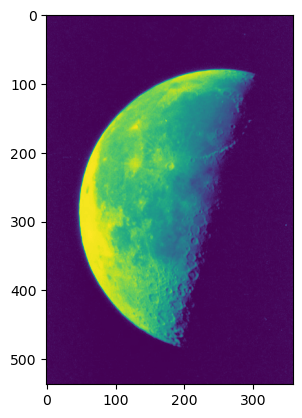

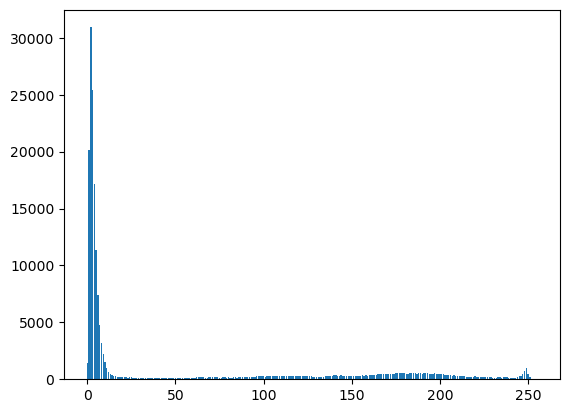

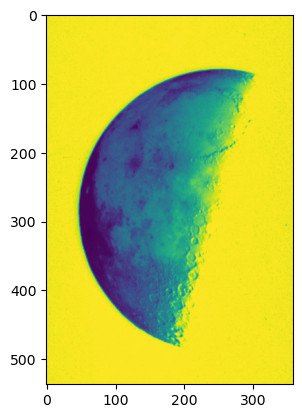

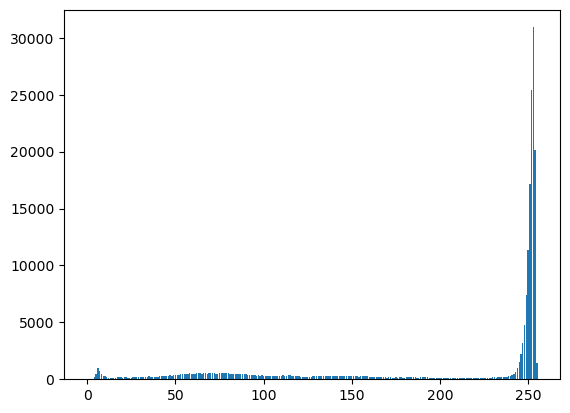

In [43]:
import matplotlib.pyplot as plt

# read image
image = openImage('img\\moon.png')
# display image
plt.imshow(image)
plt.show()

# display histogram
histogram = computeHistogram(image)
plt.bar(range(256), histogram)
plt.show()
# inverse image
inv = inverteImage(image)

plt.imshow(inv)
plt.show()

histInv = computeHistogram(inv)
plt.bar(range(256), histInv)
plt.show()



9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

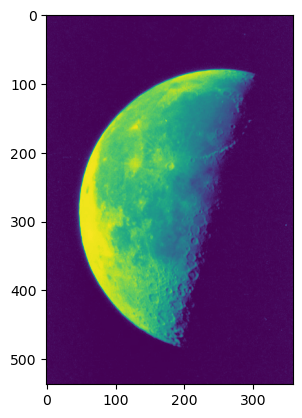

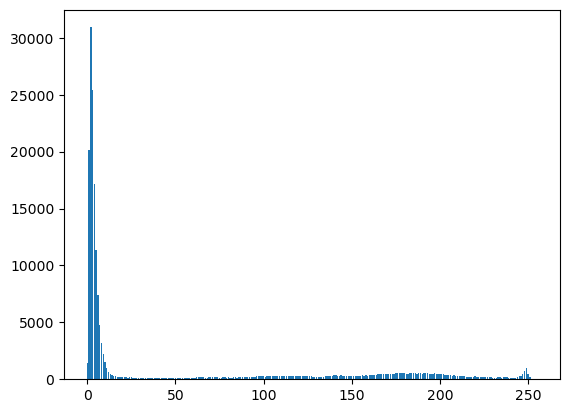

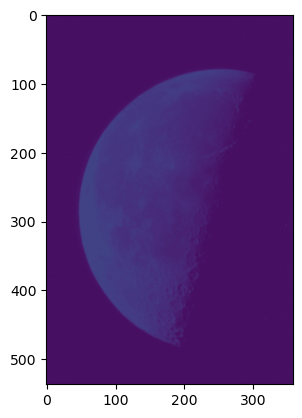

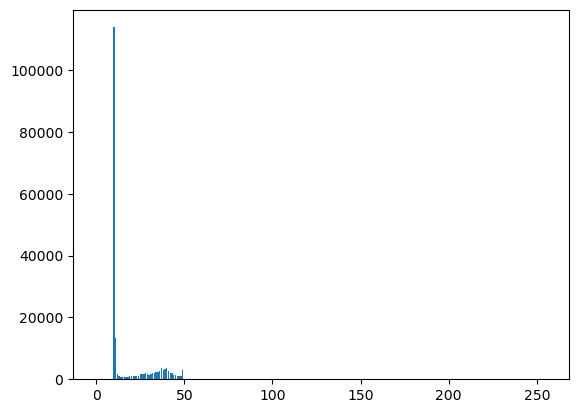

In [59]:
import matplotlib.pyplot as plt
I = openImage("img\\moon.png")
HI = computeHistogram(I)
plt.imshow(I, vmin=0,vmax=255)
plt.show()
plt.bar(range(256), HI)
plt.show()
NI = normalizeImage(I, 10, 50)
HNI = computeHistogram(NI)
plt.imshow(NI, vmin=0,vmax=255)
plt.show()
plt.bar(range(256), HNI)
plt.show()



10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

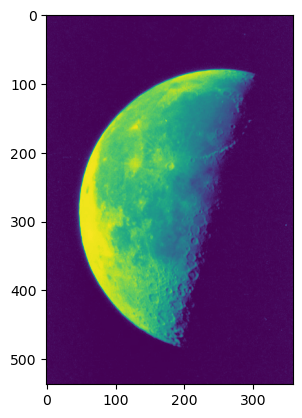

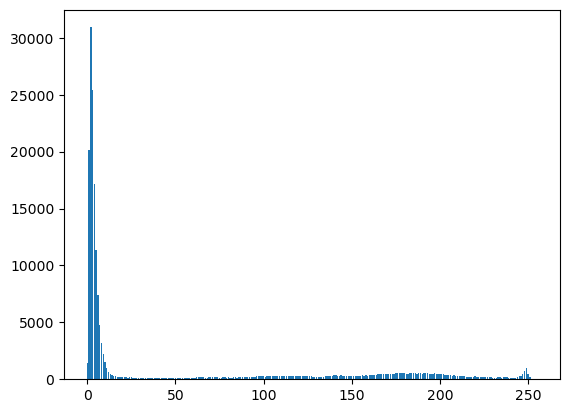

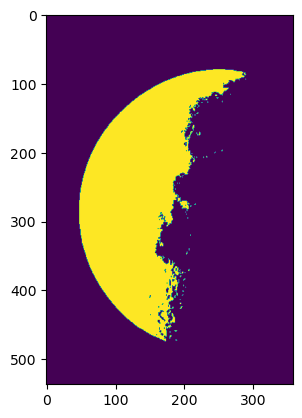

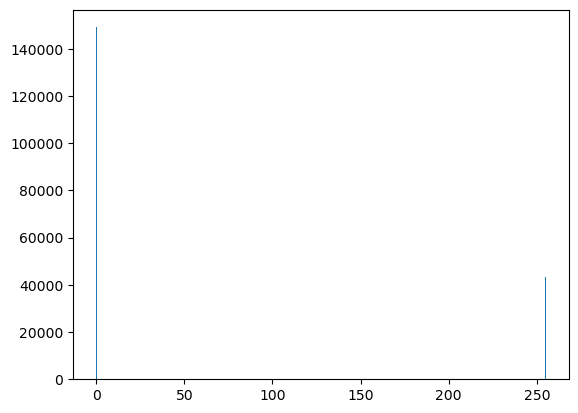

In [61]:
import matplotlib.pyplot as plt
I = openImage("img\\moon.png")
HI = computeHistogram(I)
plt.imshow(I,vmin=0,vmax=255)
plt.show()
plt.bar(range(256), HI)
plt.show()
NI = thresholdImage(I, 127)
HNI = computeHistogram(NI)
plt.imshow(NI,vmin=0,vmax=255)
plt.show()
plt.bar(range(256), HNI)
plt.show()

## Exercise 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> <img src="attachment:synthese.png" width="150"/> </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

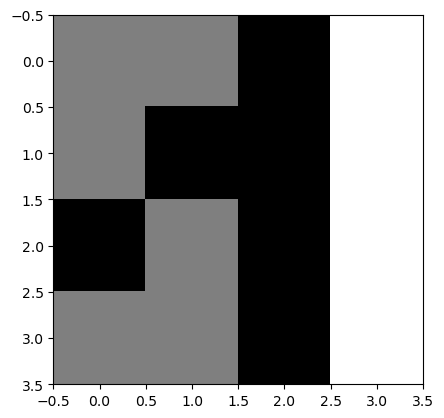

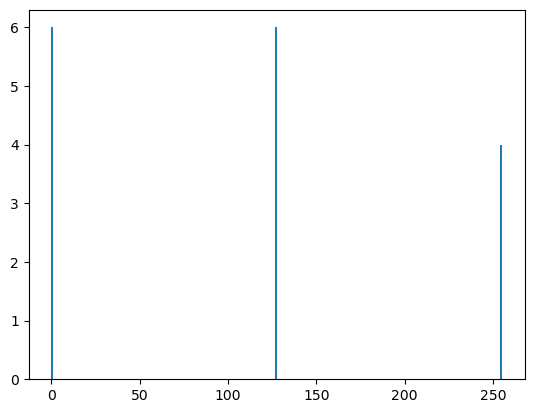

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Creating the image array
I = np.array([[127, 127, 0, 255],
              [127, 0, 0, 255],
              [0, 127, 0, 255],
              [127, 127, 0, 255]])
plt.imshow(I, cmap='gray')
plt.show()
plt.hist(I.ravel(), bins=256, range=[0, 255])
plt.show()


2. We want to generate an image having random values. Functions `rand()` and `randn()` from  `numpy.random` module generate an array of given shapes with random values following a uniform distribution on $[0,1[$ and a normal distribution respectively. Create an array of shape 512 by 512 having **integer** elements following a uniform distribution in the set $\{0,1,\cdots,255\}$. We also want to create an array following a Gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histograms. Discuss the results.

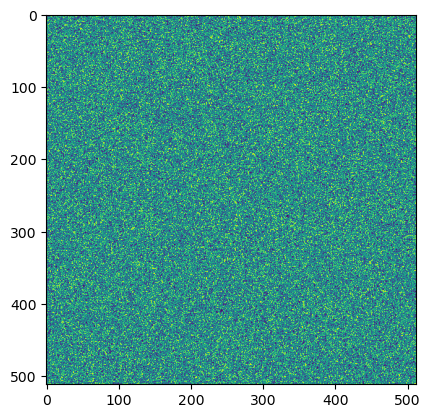

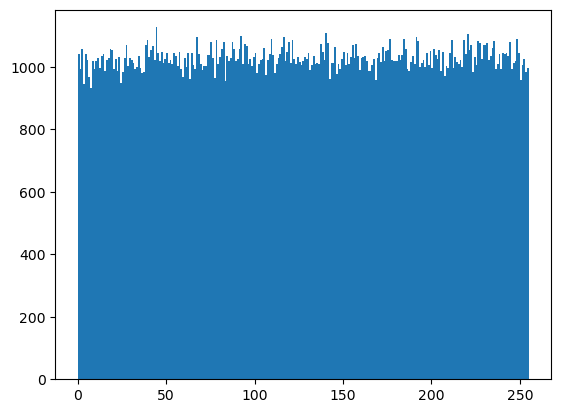

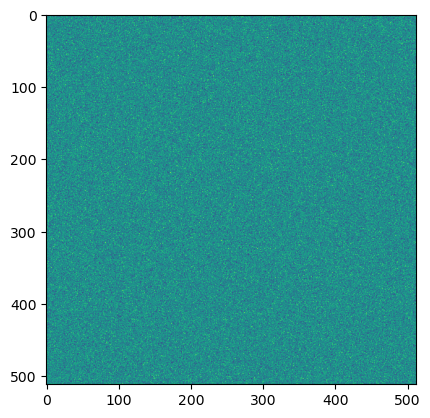

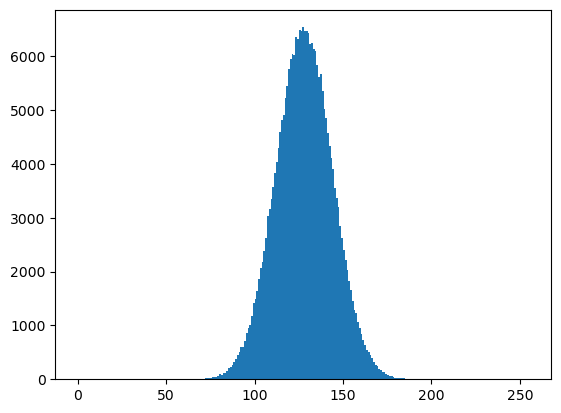

In [49]:
import matplotlib.pyplot as plt
img1 = (np.random.rand(512, 512)*255).astype(int)
plt.imshow(img1)
plt.show()
plt.hist(img1.ravel(), range(256))
plt.show()

img2 = (128 + 16*np.random.randn(512, 512)).astype(int)
plt.imshow(img2)
plt.show()
plt.hist(img2.ravel(), range(256))
plt.show()

# L'image 1, avec une distribution uniforme, montre des pixels répartis, créant un rendu très bruité et désorganisé. 
# En revanche, l'image 2, issue d'une distribution gaussienne, est plus équilibrée, avec des pixels concentrés autour des tons moyens.

## Exercise 3: image manipulation
In this exercise, we work with image `img/pout.png`. 

1. Read and display this image

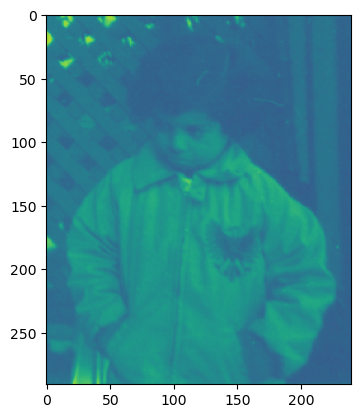

In [63]:
import matplotlib.pyplot as plt
pout = openImage("img\\pout.png")
plt.imshow(pout,vmin=0,vmax=255)
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

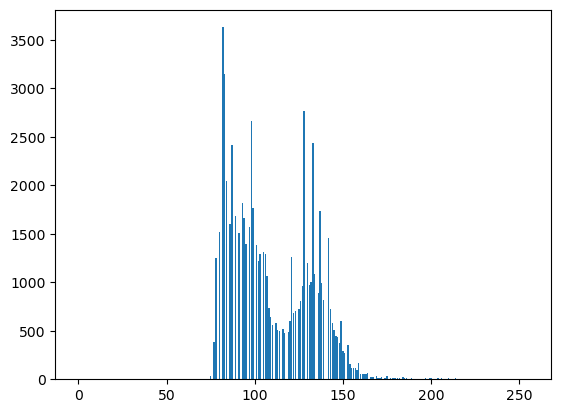

In [51]:
h_pout = computeHistogram(pout)
plt.bar(range(256), h_pout)
plt.show()
# L'extremum se trouve vers la valeur 80. L'histogramme montre une concentration de valeurs de pixels entre 75 et 150. Ce qui indique que l'image a un faible contraste et peut sembler terne.

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

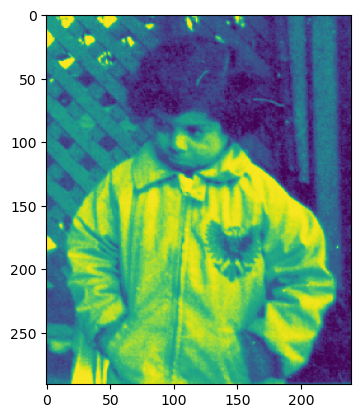

In [56]:
def histogramEqualization(I,H):
    """ Array * (list[int] -> Array """
    cumul_h = []
    cumul = 0
    I_copy = np.copy(I)
    for i in range(len(H)):
        cumul += H[i]
        cumul_h.append(cumul)
    histoNormal = [v/(len(I)*len(I[0])) for v in cumul_h]
    for i in range(len(I)):
        for j in range(len(I[0])):
            I_copy[i][j] = 255*histoNormal[I[i][j]]
    return I_copy
    
plt.imshow(histogramEqualization(pout, h_pout),vmin=0,vmax=255)
plt.show()